Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

Loading the dataset

In [3]:
data= pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
# Getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking the dataset for missing values

In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Checking the distribution of categorical columns
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [11]:
#Encoding the Fuel_Type column
data.replace({'Fuel_Type':{'Petrol':1,'Diesel':0, 'CNG':2}}, inplace=True)

#Encoding the Seller_Type column
data.replace({'Seller_Type':{'Dealer':1,'Individual':0}}, inplace=True)

#Encoding the Transmission column
data.replace({'Transmission':{'Manual':1,'Automatic':0}}, inplace=True)

In [12]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,0


In [13]:
X= data.drop(['Car_Name', 'Selling_Price'], axis=1)
y=data['Selling_Price']

In [14]:
print(X)

print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            1             0   
1    2013           9.54       43000          0            1             0   
2    2017           9.85        6900          1            1             0   
3    2011           4.15        5200          1            1             0   
4    2014           6.87       42450          0            1             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          0            1             0   
297  2015           5.90       60000          1            1             0   
298  2009          11.00       87934          1            1             0   
299  2017          12.50        9000          0            1             0   
300  2016           5.90        5464          1            1             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting the dataset

In [15]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=2)

# Model Training

1. Linear Regression

In [17]:
lin_model= LinearRegression()

In [18]:
lin_model.fit(X_train, y_train)

LinearRegression()

Model Evaluation on training data

In [26]:
training_data_prediction= lin_model.predict(X_train)

R-Squared error for training data

In [27]:
error_score= metrics.r2_score(y_train, training_data_prediction)
print("The error score is:", error_score)

The error score is: 0.8824621379730491


Data Visualization on training data for price prediction

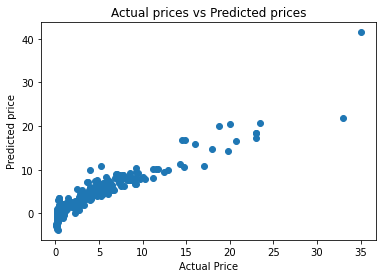

In [28]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()

Model Evaluation on test data

In [29]:
test_data_prediction= lin_model.predict(X_test)

R-Squared error for test data

In [30]:
error_score_test= metrics.r2_score(y_test, test_data_prediction)
print("The error score is:", error_score_test)

The error score is: 0.8649113014247266


Data Visualization on test data for price prediction

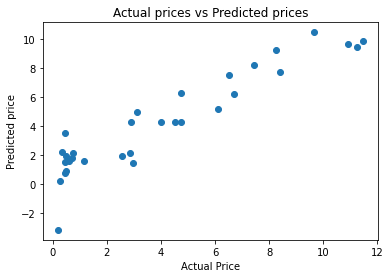

In [31]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()

2. Lasso regression

In [32]:
lasso_model= Lasso()

In [33]:
lasso_model.fit(X_train, y_train)

Lasso()

Model Evaluation on training data

In [34]:
training_data_prediction= lasso_model.predict(X_train)

R-Squared error for training data

In [35]:
error_score= metrics.r2_score(y_train, training_data_prediction)
print("The error score is:", error_score)

The error score is: 0.8427856123435794


Data Visualization on training data for price prediction

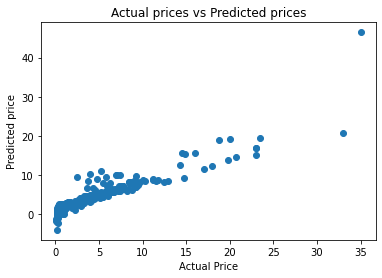

In [36]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()

Model Evaluation on test data

In [38]:
test_data_prediction= lasso_model.predict(X_test)

R-Squared error for test data

In [39]:
error_score_test= metrics.r2_score(y_test, test_data_prediction)
print("The error score is:", error_score_test)

The error score is: 0.8709167941173195


Data Visualization on test data for price prediction

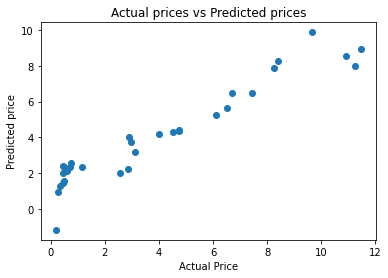

In [40]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()